# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of meta details about the movies and tv shows as genre. 
Also details about Users activities, spent duration and if watching in High definition or standard definition. 
You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.

In [ ]:
dataframe = pd.read_excel("/content/stc TV Data Set_T1.xlsb", sheet_name="Final_Dataset")
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [ ]:
# check the data shape
dataframe.shape

(1048575, 13)

In [ ]:
# display the first 5 rows 
dataframe.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
dataframe.dtypes


Column1              int64
date_                int64
user_id_maped        int64
program_name        object
duration_seconds     int64
program_class       object
season               int64
episode              int64
program_desc        object
program_genre       object
series_title         int64
hd                   int64
original_name       object
dtype: object

In [ ]:
# Data Preprocessing on the input data
dataframe = dataframe.drop(columns=['Column1'])         # dropping the index column
dataframe['program_name'] = dataframe['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframe['date_'] = pd.to_datetime(dataframe['date_'], unit='d', origin='30/12/1899')  # read date column as date data type
dataframe[['duration_seconds', 'season','episode','series_title','hd']] = dataframe[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframe[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

In [ ]:
# display the dataset after applying data types
dataframe.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

In [ ]:
dataframe.isnull().sum()

date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_desc        0
program_genre       0
series_title        0
hd                  0
original_name       0
dtype: int64

# Task 1
##### You are required to work on task one to study and HD flag for available dataset

In [ ]:
# make a copy of the dataframe for working on task 1
df=dataframe.copy()

In [ ]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes 
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [ ]:
# show the result
grouped.head(10)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [ ]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [ ]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [ ]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


In [ ]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

In [ ]:
"""
TODO study the relation and user's behaviour Against HD flag, feel free to include any comparison 
"""


In [ ]:
#Change the binary values of hd column into HD if value is 1 and SD if 0
dataframe.hd[dataframe.hd == 1] = 'HD'
dataframe.hd[dataframe.hd == 0] = 'SD'


<ipython-input-24-230335145032>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-230335145032>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataframe.head(20)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,SD,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,HD,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,HD,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,HD,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,HD,Churchill
5,2017-08-19,20775,Beavis And Butt-Head Do America,3,MOVIE,0,0,Animation MovieBeavis And Butt-Head Do America,Animation,0,SD,Beavis And Butt-Head Do America
6,2017-06-26,11374,The Mermaid Princess,33577,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,HD,The Mermaid Princess
7,2018-03-29,6358,Coco,14,MOVIE,0,0,Animation MovieCoco (HD),Animation,0,HD,Coco
8,2018-01-27,11660,Kidnap,85,MOVIE,0,0,Action MovieKidnap (HD),Action,0,HD,Kidnap
9,2017-03-30,5155,The Accountant,42,MOVIE,0,0,Action MovieThe Accountant (HD),Action,0,HD,The Accountant


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

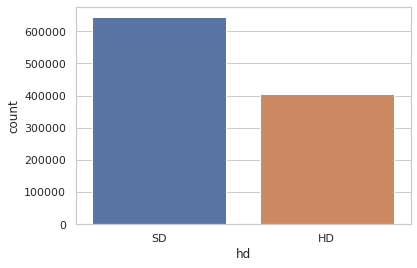

In [ ]:
sns.countplot(x=dataframe["hd"])

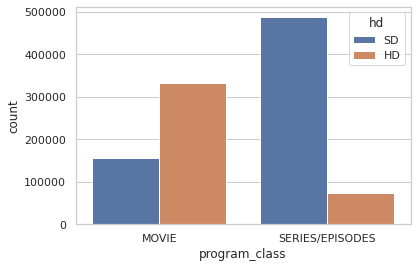

In [ ]:
# count plot on quality and program calss
sns.countplot(x = "program_class", hue ="hd", data = dataframe)

In [ ]:
quality = dataframe.groupby(['program_class', 'hd'])

In [ ]:
#Trying to count the number of movies and series that has been whatched SD and HD
numbers_of_class= quality.program_name.count()

In [ ]:
numbers_of_class

program_class    hd
MOVIE            HD    331746
                 SD    156655
SERIES/EPISODES  HD     73290
                 SD    486884
Name: program_name, dtype: int64

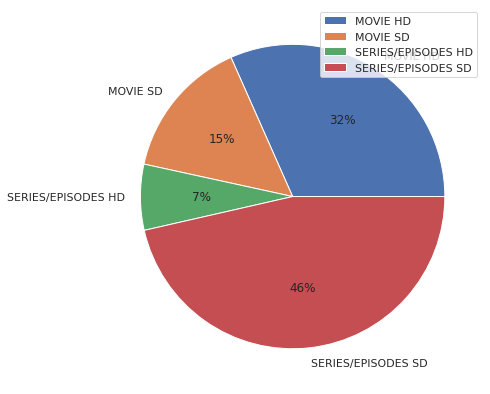

In [ ]:
#Pie chart to visualize the percentage 
mylabels = ["MOVIE HD", "MOVIE SD", "SERIES/EPISODES HD", "SERIES/EPISODES SD"]
fig = plt.figure(figsize =(10, 7))
plt.pie(numbers_of_class, labels = mylabels, autopct='%.0f%%')
plt.legend(title ="Quality",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.legend()
plt.show() 

**As Shown in the visualizations, most of users watching the Movies in HD quality, and watches the series in SD quality. **